# Comparativa de la solución numérica de la ecuación de advección-difusión 

**Objetivo general**
- Llevar a cabo una comparación de los metodologías de la solución numérica de la ecuación de advección-difusión (EAD) utilizada para transporte de especies. Esto con el objetivo de seleccionar la más conveniente para el proyecto **Ciencia de Frontera Especies Contaminantes de Nitrógeno** 

**Objetivos particulares**
- Realizar un estudio de sensibilidad de la solución 1D, 2D y posiblemente 3D de las diferentes métodologías.
- Identificar los parametros fisicos y numéricos más importantes.
- Seleccionar la metodología conveniente
  

# Contenido
- [1 - Resolución de un problema de ingeniería mediante matemática computacional](#1)
- [2 - Métodos tradicionales por diferencias finitas](#2)
- [3 - Método EMA](#3)

<a name='1'></a>
# 1. Resolución de un problema de ingeniería mediante matemática-numérica computacional 
Un problema de ingeniería se resuelve numéricamente siguiendo los siguientes pasos:
* Definir un esquema físico conceptual, descripción de lo que se quiere resolver.
* Definir la ecuación matemática, generalmente una EDP que "mejor" describa el esquema o modelo físico.
* Definir la métodología numérica de solución.
* Definir el lenguaje de programación e implementación computacional.

 [1.1 - Definir un esquema físico conceptual (problema unidimensional)](#1-1)

Se tiene un acuifero subterraneo en una capa o layer uniforme con sus fronteras superior e inferior impermeables que se extiende por una longitud $L$, por el cual se infiltra agua por el extremo izquierdo transportando una sola especie de concetración $C$ y tiene salida por el extremo derecho. Obtenga el perfil de concentración $C(x)$ en todo el acuifero. 

Debido a la naturaleza problema, se puede plantear de forma unidimensional.

<img src="fig1D.png" width="500px" height="auto" />

[1.2 - Definir una EDP para describir el proceso](#1-2)

La ecuación de advección difusión que rige el transporte de una especie esta dada por:

$$\theta \frac{\partial c}{\partial t} = -q \nabla c + D_{H}\nabla^{2} c + r(c_{r}-c)$$

En una dimensión: 
$$\theta \frac{\partial c}{\partial t} = -q \frac{\partial c}{\partial x}  + D_{H}\frac{\partial^{2} c}{\partial x^{2}} + r(c_{r}-c) \tag{1.1}$$

donde $c$ reprenta la concentración de una especie, $q$ el flujo del fluido que transporta esa especie, $D_{H}$, el coeficiente de difusión, $r$ la recarga y $c_{r}$ la concentración de la especie en la recarga, es decir, $r>0$.  Si $r<0$, entonces $c_{r}=c$ (sale agua residente). Pero si $r<0$ y existe evaporación, entonces $c_{r}=0$, (no sale masa). 

**Condiciones de frontera e iniciales**

En las entradas:
$$qc-D_{H}\frac{\partial c}{\partial x}= q_{inf}c_{inf} $$
$$-qc+D_{H}\frac{\partial c}{\partial x}= qc <-> D_{H}\frac{\partial c}{\partial x}=0 $$

Para adimensionalizar la ecuación se utilizan los siguientes parámetros: 

1. Longitud caracteristica $L_{c}=\frac{D_{H}}{q}$.
2. Tiempo caracteristico: $t_{c}=\frac{\theta D_{H}}{q^{2}}$.
3. Concentración caracteristica $c_{c}=c_{inf}$.
4. Recarga caracteristica $r_{c}=\frac{q}{L_{c}}$ recarga que, aplicada sobre $L_{c}$, produce un flujo $q$.

Entonces las variables adimensionales son: $x_{D}=\frac{x}{L_{c}}=\frac{qx}{D_{H}}$, $t_{D}=\frac{t}{t_{c}}=\frac{q^{2}t}{\theta D_{H}}$ y $c_{D}=\frac{c}{c_{c}}=\frac{c}{c_{inf}}$, reecribiendo la ecuación (1.1), en variables adimensionales se obtiene:

$$\frac{\partial c_{D}}{\partial t_{D}} = -\frac{\partial c_{D}}{\partial x_{D}}  + \frac{\partial^{2} c_{D}}{\partial x_{D}^{2}} + r_{D}(c_{rD}-c_{D}) \tag{1.2}$$

<a name='2'></a>
# 2. Métodos tradicionales por diferencias finitas

Se propone la utilización de un malla por celdas o bloques centrados, donde las celdas pueden ser o no uniformes, suponemos $q_{inf}$, en $x=0$ y recarga en todo el dominio. Adicionalmente se supone flujo estacionario, es decir, $q$ solo varía con la posición pero es independiente del tiempo, para ello el flujo en las interfaces es $q_{i+1/2}=q_{i-1/2}+r{i} \Delta x$.  

Siguiendo la métodogía tradicional, se utiliza primero un esquema implícito en el tiempo y diferencias finitas centrales para resolver la ecuación (1), es decir, sin adimensionalizar:

$$\theta \frac{\partial c}{\partial t} = -q \frac{\partial c}{\partial x}  + D_{H}\frac{\partial^{2} c}{\partial x^{2}} + r(c_{r}-c) \tag{1.1}$$

Considerando el esquema de celdas centrales:

<img src="fig3.png" width="350px" height="auto" />

Discretizando con diferencias finitas centrales término a término de la ecuación (2.1):

**Término acumulativo o temporal:** 
$$\theta\frac{\partial c}{\partial t}=\theta_{i}\frac{c^{n+1}_{i}-c^{n}_{i}}{\Delta t}   $$

**Término advectivo**
$$-q\frac{\partial c}{\partial x}=-q_i^{n+1}\frac{c_{i+1}^{n+1}-c_{i-1}^{n+1}}{2\Delta x_{i}}$$

**Término difusivo**
$$D_H\frac{\partial^2c}{\partial x^2}=D_{Hi}^{n+1}\frac{c_{i-1}^{n+1}-2c_{i}^{n+1}+c_{i+1}^{n+1}}{\Delta x_{i}^{2}}$$

**Término fuente:  sumidero, fuente o reactivo**
$$r\left(c_r-c\right)=r_{i}\left(c_{ri}^{n+1}-c_{i}^{n+1}\right)$$

Sustituyendo los térmios anteriores en la ec. (2.1), desarrollando y agrupando términos en forma de sistema líneal de ecuaciones:

$$T_{E}c_{i+1}^{n+1}+T_{C}c_{i}^{n+1}+T_{W}c_{i-1}^{n+1}=B_{i}$$ 


In [1]:
#------------------------------------------------------------------------------------------#
#-------------------------- Importación de bibliotecas a utilizar -------------------------#
#------------------------------------------------------------------------------------------#

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.sparse import lil_matrix           #Importación del modulo scipy que convierte una matriz en una lista
from scipy.sparse import csr_matrix           #Importación del modulo csr_matrix para emplear el método CSR para la solución del sistema de ecuaciones
from scipy.sparse.linalg import spsolve  

from time import time                         #Importación del modulo time para determinar los tiempos de cálculo


In [2]:
#------------------------------------------------------------------------------------------#
#------------- Datos de entrada: Fuente hoja de cálculo excel WMA -------------------------#
#------------------------------------------------------------------------------------------#

long_x = 15.0                         #Longitud en "x" en [ft]
teta = 1.0                            #Adimensional [Adim.]
DH = 1.0                              #coefciente de difusión??? [m2/dia]
r = -0.02                             #recarga o descarga  [1/dia]
cr = 0.0                              #concentración de recarga [Adim.]
nds_x = 30                            #Cantidad de nodos en "x"
t_sim = 50.8                          #Tiempo de simulación (dias)
dt = 0.4                              #Paso de tiempo (dias)
q_inf = 1.0                           #Condición de frontera izquierda en [m/dia]
c_inf = 0.0                           #Condición de frontera izquierda en [m/dia]
c_out = 0.0                           #Condición de frontera derecha en [m/dia]
long_ini_cini = 1.0                   #Posición inicial de las condiciones iniciales de concentraciones en [ft]
long_fin_cini = 7.5                   #Posición final de las condiciones iniciales de concentraciones en [ft]


In [3]:
#------------------------------------------------------------------------------------------#
#--------------------------- Malla de simulación espcio y tiempo ----------------------------#
#------------------------------------------------------------------------------------------#

delta_x = long_x/nds_x                                           #Delta en "x" considerando un espaciamiento homogéneo entre nodos en [m]
xi = np.linspace((delta_x)/(2), long_x-(delta_x/2), nds_x)        #Posición de los nodos en "i" en [m]
x_frntrs = np.linspace(0, long_x, nds_x+1)                      #Posición de las fronteras "i+1/2 e i-1/2" en [m]

t = np.arange(0, t_sim+0.01, dt)           #Vector de tiempo en [Días]
nt = len(t)-1                             #numero de pasos de tiempo 

In [4]:
#------------------------------------------------------------------------------------------#
#---------- Calculando los valores de q para cada nodo y fronteras de la celdas ----------------#
#------------------------------------------------------------------------------------------#

q_frnts = np.zeros(nds_x+1)                       #Vector de q en las fronteras de las celdas en [m/dias]
q_i = np.zeros(nds_x)                             #Vector de q en los nodos o centros "i" en [m/dias]
for i in range(0, nds_x+1):
    if i == 0:
        q_frnts[i] = q_inf                        #Valor de q en 0-1/2 de la primera frontera (que sería la condición de frontera izquierda de qinf)
    else:
        q_frnts[i] = q_frnts[i-1]+(r*delta_x)    #Valor de q en las demás fronteras en i-1/2, i+1/2 
        q_i[i-1] = (q_frnts[i-1]+q_frnts[i])/2   #Valor de q en los nodos i


In [5]:
#------------------------------------------------------------------------------------------#
#------ Definiendo vectores y matriz  para el sistema de eq lineales ---------------------#
#------------------------------------------------------------------------------------------#

TE = np.zeros(nds_x)                          #Vector de transmisibilidad en i+1/2
TW = np.zeros(nds_x)                          #Vector de transmisibilidad en -1/2
TC = np.zeros(nds_x)                          #Vector central C
B = np.zeros(nds_x)                           #Vector de valores conocidos, lado derecho 
mtrz_coef = np.zeros((nds_x, nds_x))          #Matriz de coeficientes para la solución del sistema de ecuaciones
c_ini = np.zeros(nds_x)                       #Vector de condiciones iniciales de c
c_n = np.zeros(nds_x)                         #Vector de valor de c a un paso de tiempo n (necesario para la solución del sistema de ecuaciones)
c_v = np.zeros(nds_x)                         #Vector de valor de c a un paso de tiempo n+1
solcns_c = np.zeros((nt+1, nds_x))            #Matriz de guardado de las c para cada paso de tiempo y en toda la malla 1D (incluyendo las condiciones iniciales al tiempo cero)


In [6]:
#------------------------------------------------------------------------------------------#
#---------------------------- Definiendo condiciones iniciales ----------------------------#
#------------------------------------------------------------------------------------------#

for i in range(0, nds_x):
    if xi[i] >= long_ini_cini and xi[i] <= long_fin_cini:   #Si los nodos en xi están dentro de este rango se tiene la condición inicial de c = 1
        c_ini[i] = 1
    else:
        c_ini[i] = 0                          #Si los nodos en xi no se encuentran dentro del rango se tiene la condición inicial de c = 0

c_n[:] = c_ini[:]                             #Inicializando el vector c_n
solcns_c[0][:] = c_n[:]                       #Guardando el valor de las condiciones iniciales en la matriz de soluciones de c


In [7]:
#------------------------------------------------------------------------------------------#
#------------------------ Inicio del ciclo solución en el tiempo --------------------------#
#------------------------------------------------------------------------------------------#
tiempoComputo_inicial = time()       

for ti in range(0, nt):
        
    #--------------------------------------------------------------------------------------#
    #----------------- Calculando transmisibilidades en i, i+1/2 e i-1/2 ------------------#
    #--------------------------------------------------------------------------------------# 
    
    for i in range(0, nds_x):                                                               #Se calculó la transmisibilidad en todos los nodos ya que se considera el nodo fantasma para las condiciones de frontera, entonces, el nodo en nx+1/2 se utilizará en B
        TE[i] = (-((q_i[i])/(2*delta_x))+((DH)/((delta_x)**(2))))                             #Transmisibilidad en xi+1/2
    
    for i in range(0, nds_x):                                                               #Se calculó la transmisibilidad en todos los nodos ya que se considera el nodo fantasma para las condiciones de frontera, entonces, el nodo en 0-1/2 se utilizará en B
        TW[i] = (((q_i[i])/(2*delta_x))+((DH)/((delta_x)**(2))))                              #Transmisibilidad en xi-1/2
    
    for i in range(0, nds_x):
        TC[i] = -((TE[i])+(TW[i])+(r)+(teta/dt))
    
    for i in range(0, nds_x):
        if i == 0:
            B[i] = -((teta/dt)*(c_n[i]))-(r*cr)-(TW[i]*c_inf)                           #Condición de frontera izquierda Dirichlet (primera clase)
        elif i == nds_x-1:
            # B[i] = -((teta/dt)*(c_n[i]))-(r*cr)-(TE[i]*c_out)                           #Condición de frontera derecha Dirichlet (primera clase)
            B[i] = -((teta/dt)*(c_n[i]))-(r*cr)-(TE[i]*c_n[nds_x-1])                           #Condición de frontera derecha dC/dx=0  Neumann
        else:
            B[i] = -((teta/dt)*(c_n[i]))-(r*cr)
        
    #--------------------------------------------------------------------------------------#
    #------------------------ Calculando la matriz de coeficientes ------------------------#
    #--------------------------------------------------------------------------------------# 
    
    for i in range(0, nds_x):
        mtrz_coef[i][i] = TC[i]
    
    for i in range (0, nds_x-1):
        mtrz_coef[i][i+1] = TE[i]
    
    for i in range (0, nds_x-1):
        mtrz_coef[i+1][i] = TW[i+1]
    
    #--------------------------------------------------------------------------------------#
    #------------------------ Resolviendo el sistema de ecuaciones ------------------------#
    #--------------------------------------------------------------------------------------#
    
    am = lil_matrix(mtrz_coef)                                                              #Función que pasa de una matriz densa a una matriz tipo lista
    am = am.tocsr()
    solcn_cs = spsolve(am, B)                                                               #Resolviendo el sistema de ecuaciones
    
    for i in range (0, nds_x):
        c_v[i] = solcn_cs[i]                                                                #Guardando las soluciones en el vector c_v
        
    solcns_c[ti+1][:] = c_v[:]                                                              #Guardando las soluciones en la matriz de c para cada paso de tiempo
    c_n[:] = c_v[:]                                                                         #Guardando el valor de c al tiempo n que se utilizará en el siguiente paso de tiempo

    print("tiempo de simulacion: " +str(round(dt*(ti+1),2))+" dias" )


#------------------------------------------------------------------------------------------#
#---------------------- Tiempo de ejecución del modelo de simulación ----------------------#
#------------------------------------------------------------------------------------------# 

tiempoComputo_final=time()                                                                         #Toma el valor de tiempo final de ejecución, para  calcuar el tiempo total de la simulación
tiempo_ejec_seg=(tiempoComputo_final-tiempoComputo_inicial)                                               #Calcula el tiempo total de simulación, pasado a segundos
tiempo_ejec_min=(tiempoComputo_final-tiempoComputo_inicial)/60                                            #Calcula el tiempo total de simulación, pasado a minutos
print("\nTiempo de Ejecución:",tiempo_ejec_seg, "[Segundos]","\t", tiempo_ejec_min, "[Minutos]\n")
print("|------------------------------------------------------------------------------|")
print("|-------------------------- FIN DE LA SIMULACIÓN xdxd -------------------------|")
print("|------------------------------------------------------------------------------|")

tiempo de simulacion: 0.4 dias
tiempo de simulacion: 0.8 dias
tiempo de simulacion: 1.2 dias
tiempo de simulacion: 1.6 dias
tiempo de simulacion: 2.0 dias
tiempo de simulacion: 2.4 dias
tiempo de simulacion: 2.8 dias
tiempo de simulacion: 3.2 dias
tiempo de simulacion: 3.6 dias
tiempo de simulacion: 4.0 dias
tiempo de simulacion: 4.4 dias
tiempo de simulacion: 4.8 dias
tiempo de simulacion: 5.2 dias
tiempo de simulacion: 5.6 dias
tiempo de simulacion: 6.0 dias
tiempo de simulacion: 6.4 dias
tiempo de simulacion: 6.8 dias
tiempo de simulacion: 7.2 dias
tiempo de simulacion: 7.6 dias
tiempo de simulacion: 8.0 dias
tiempo de simulacion: 8.4 dias
tiempo de simulacion: 8.8 dias
tiempo de simulacion: 9.2 dias
tiempo de simulacion: 9.6 dias
tiempo de simulacion: 10.0 dias
tiempo de simulacion: 10.4 dias
tiempo de simulacion: 10.8 dias
tiempo de simulacion: 11.2 dias
tiempo de simulacion: 11.6 dias
tiempo de simulacion: 12.0 dias
tiempo de simulacion: 12.4 dias
tiempo de simulacion: 12.8 dias


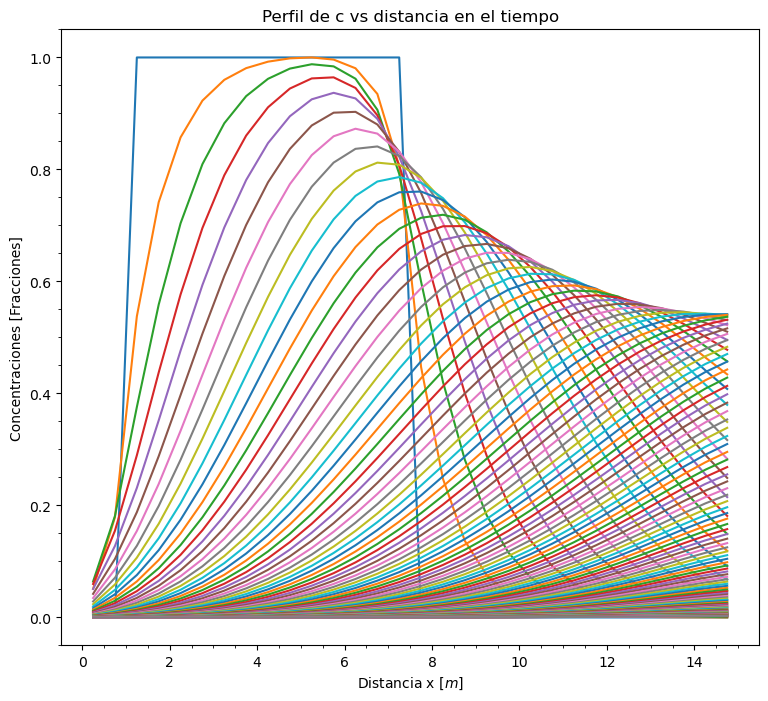

In [8]:
#------------------------------------------------------------------------------------------#
#--------------------------- Graficando todos los resultados ------------------------------#
#------------------------------------------------------------------------------------------#

plt.figure('Graf_cs',figsize=(9,8))
plt.style.use('fast')
plt.minorticks_on()
plt.title('Perfil de c vs distancia en el tiempo')
for i in range(0, nt+1):
    plt.plot(xi, solcns_c[i][:]) 
# plt.legend(loc=4)
plt.xlabel("Distancia x [$m$]")
plt.ylabel("Concentraciones [$adim$]")                                                                        
plt.grid(True,which='major', color='w', linestyle='-')
plt.grid(True, which='minor', color='w', linestyle='--')

In [ ]:
#--------------------------------------------------------------------------------------------------#
#------------------------ Graficando un solo resultado y comparandolo vs WMAI ----------------------#
#---------------------------------------------------------------------------------......---------#


WMA_I=pd.read_excel('comparativa.xlsx', sheet_name='WMA_I')     #Crea un data frame llamado WMA_I a partir de la tabla de excel
#WMA_I
data_set = WMA_I.iloc[13:,9:39].to_numpy()
#data_set

plt.figure('Graf_1r', figsize=(12,8))
plt.title('Comparativa vs condicion inicial')
tsel=40
lg=str(round(tsel*dt,2))
plt.plot(xi, solcns_c[0][:], "-r"  , label="Condicion inicial")
plt.plot(xi, solcns_c[tsel][:], "--bo", label="Tiempo de simulacion "+lg+" dias este nootebook")
plt.plot(xi, data_set[tsel][:], "-.*m", label="Tiempo de simulacion "+lg+" dias WMA_I" )
plt.xlabel("Distancia x [$m$]"), plt.ylabel("c $[adim]$")
plt.legend(loc=0); plt.minorticks_on()
plt.grid(True,which='major', color='w', linestyle='-')
plt.grid(True, which='minor', color='g', linestyle='--')
